In [ ]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
import pandas as pd
import sqlite3

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('/content/cs4400.sql')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Read SQL script from file
with open('/content/cs4400.sql', 'r') as file:
    sql_script = file.read()

# Execute the SQL script
cursor.executescript(sql_script)

# Commit the changes
conn.commit()

# Close the connection
conn.close()


In [ ]:
def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table

    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created.
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')

    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()

In [ ]:
def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe

    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.

    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def calculate_cosine_similarity(sentence1: str, sentence2: str) -> float:
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform([sentence1, sentence2])
  cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
  return cosine_sim

In [ ]:
# Define two example sentences
sentence1 = "SELECT query from DATABASE where X = 24"
sentence2 = "SELECT this query from the DATABASE WHERE X = 24"

calculate_cosine_similarity(sentence1, sentence2)

array([[0.77651453]])

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig
fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)
accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

In [ ]:
from datasets import load_dataset

train_dataset = load_dataset('gem/viggo', split='train')
eval_dataset = load_dataset('gem/viggo', split='validation')
test_dataset = load_dataset('gem/viggo', split='test')

In [ ]:
print(train_dataset)
print(eval_dataset)
print(test_dataset)

In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig


# base_model_id = "mistralai/Mistral-7B-v0.1"
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_compute_dtype=torch.bfloat16
# )
# model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00


In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [ ]:
def extract_comments(sql_file_path):
    comments = []
    with open(sql_file_path, 'r') as file:
        in_multiline_comment = False
        for line in file:
            line = line.strip()
            if line.startswith('--'):
                comments.append(line.lstrip('-').strip())
            elif line.startswith('/*'):
                in_multiline_comment = True
                if line.endswith('*/'):
                    in_multiline_comment = False
            elif line.endswith('*/'):
                in_multiline_comment = False
            elif in_multiline_comment:
                comments.append(line)
    return comments

# Provide the path to your SQL file
sql_file_path = '/content/cs4400_autograder company_only v10_1-1.sql'

# Extract comments from the SQL file
comments = extract_comments(sql_file_path)

# Print the extracted comments
print(comments)


['CS4400: Introduction to Database Systems: Wednesday, September 7, 2022', 'SQL Autograding Environment (v10.3): Company Database (PRACTICE ONLY)', 'Version 10.3: Reset database state after testing w/magic44_set_database_state()', '-------------------------------------------------', 'ENTER YOUR QUERY SOLUTIONS STARTING AT LINE 90', '-------------------------------------------------', '-----------------------------------------------', 'table structures', '-----------------------------------------------', 'Enter your queries in the area below using this format:', 'create or replace view practiceQuery<#> as', '<your proposed query solution>;', "Be sure to end all queries with a semi-colon (';') and make sure that", 'the <#> value matches the query value from the practice sheet', '-------------------------------------------------', 'view structures (student created solutions)', 'PUT ALL PROPOSED QUERY SOLUTIONS BELOW THIS LINE', '-------------------------------------------------', 'CS4400:

In [ ]:
test_queries = []
for comment in comments:
  if comment.startswith('practiceQuery'):
    test_queries.append(comment)

In [ ]:
test_queries

In [ ]:
def get_substring_after_colon(input_string):
    index_of_colon = input_string.find(':')
    if index_of_colon != -1:
        return input_string[index_of_colon + 1:]
    else:
        return "No colon found in the input string."

# Example usage:
input_string = "This is a sample string: with some text after colon."
substring_after_colon = get_substring_after_colon(input_string)
print("Substring after colon:", substring_after_colon)

Substring after colon:  with some text after colon.


In [ ]:
question_queries = []
for query in test_queries:
  question_queries.append(get_substring_after_colon(query)[1:])

In [ ]:
actual_queries[0]

NameError: name 'actual_queries' is not defined

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip uninstall scipy

Found existing installation: scipy 1.13.0
Uninstalling scipy-1.13.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-24bff013.3.26.dev.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.13.0


In [ ]:
from datasets import load_dataset

# Load the IMDb dataset
imdb_dataset = load_dataset('gretelai/synthetic_text_to_sql')

# Print information about the dataset
print(imdb_dataset)

# Access the train split
train_data = imdb_dataset['train']

# Print the first few examples
for example in train_data[:5]:
    print(example)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 5851
    })
})
id
domain
domain_description
sql_complexity
sql_complexity_description
sql_task_type
sql_task_type_description
sql_prompt
sql_context
sql
sql_explanation


In [ ]:
train_data

Dataset({
    features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
    num_rows: 100000
})

In [ ]:
# The model that you want to train from the Hugging Face hub
model_name = "NousResearch/llama-2-7b-chat-hf"

# The instruction dataset to use
dataset_name = "mlabonne/guanaco-llama2-1k"

# Fine-tuned model name
new_model = "llama-2-7b-miniguanaco"

################################################################################
# QLoRA parameters
################################################################################

# LoRA attention dimension
lora_r = 64

# Alpha parameter for LoRA scaling
lora_alpha = 16

# Dropout probability for LoRA layers
lora_dropout = 0.1

################################################################################
# bitsandbytes parameters
################################################################################

# Activate 4-bit precision base model loading
use_4bit = True

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Activate nested quantization for 4-bit base models (double quantization)
use_nested_quant = False

################################################################################
# TrainingArguments parameters
################################################################################

# Output directory where the model predictions and checkpoints will be stored
output_dir = "./results"

# Number of training epochs
num_train_epochs = 1

# Enable fp16/bf16 training (set bf16 to True with an A100)
fp16 = False
bf16 = False

# Batch size per GPU for training
per_device_train_batch_size = 4

# Batch size per GPU for evaluation
per_device_eval_batch_size = 4

# Number of update steps to accumulate the gradients for
gradient_accumulation_steps = 1

# Enable gradient checkpointing
gradient_checkpointing = True

# Maximum gradient normal (gradient clipping)
max_grad_norm = 0.3

# Initial learning rate (AdamW optimizer)
learning_rate = 2e-4

# Weight decay to apply to all layers except bias/LayerNorm weights
weight_decay = 0.001

# Optimizer to use
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine)
lr_scheduler_type = "constant"

# Number of training steps (overrides num_train_epochs)
max_steps = -1

# Ratio of steps for a linear warmup (from 0 to learning rate)
warmup_ratio = 0.03

# Group sequences into batches with same length
# Saves memory and speeds up training considerably
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 25

# Log every X updates steps
logging_steps = 25

################################################################################
# SFT parameters
################################################################################

# Maximum sequence length to use
max_seq_length = None

# Pack multiple short examples in the same input sequence to increase efficiency
packing = False

# Load the entire model on the GPU 0
device_map = {"": 0}

In [ ]:
# Load dataset (you can process it here)
dataset = load_dataset(dataset_name, split="train")

In [ ]:
len(dataset['text'][0])

NameError: name 'dataset' is not defined

In [ ]:
# Load dataset (you can process it here)
dataset = load_dataset(dataset_name, split="train")

# Load tokenizer and model with QLoRA configuration
compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)

# Check GPU compatibility with bfloat16
if compute_dtype == torch.float16 and use_4bit:
    major, _ = torch.cuda.get_device_capability()
    if major >= 8:
        print("=" * 80)
        print("Your GPU supports bfloat16: accelerate training with bf16=True")
        print("=" * 80)

# Load base model
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1

# Load LLaMA tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right" # Fix weird overflow issue with fp16 training

# Load LoRA configuration
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)

# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="tensorboard"
)

# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
    packing=packing,
)

# Train model
trainer.train()

# Save trained model
trainer.model.save_pretrained(new_model)

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git


In [ ]:
from transformers import AutoModelForCausalLM

model = AutoModelForCausalLM.from_pretrained("facebook/opt-350m", load_in_4bit=True, device_map="auto")

In [ ]:
import sqlite3
import random
import string

# Function to generate random string
def random_string(length):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(length))

# Function to generate random data
def generate_data(num_entries):
    data = []
    for _ in range(num_entries):
        name = random_string(8)
        age = random.randint(18, 80)
        email = f"{name}@example.com"
        data.append((name, age, email))
    return data

# Function to create a random SQL database
def create_database(db_name, num_entries):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Create table
    cursor.execute('''CREATE TABLE IF NOT EXISTS Users
                    (Name TEXT, Age INT, Email TEXT)''')

    # Generate and insert random data
    data = generate_data(num_entries)
    cursor.executemany('''INSERT INTO Users (Name, Age, Email)
                          VALUES (?, ?, ?)''', data)

    conn.commit()
    conn.close()

# Function to query the database
def query_database(db_name, query):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Example query: Select all users older than 30
    cursor.execute(query)
    rows = cursor.fetchall()

    for row in rows:
        print(row)

    conn.close()

# Usage example
db_name = "random_database.db"
num_entries = 100
create_database(db_name, num_entries)
query = '''SELECT * FROM Users WHERE Age > 30'''
query_database(db_name, query)

In [ ]:
import sqlite3

# Function to get the schema of the database
def get_schema(db_name):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()

    # Query to get the schema
    cursor.execute("SELECT name, sql FROM sqlite_master WHERE type='table'")
    tables = cursor.fetchall()

    # Print the schema
    for table in tables:
        print(f"Table: {table[0]}")
        print(f"Schema: {table[1]}")

    conn.close()

# Usage example
db_name = "random_database.db"
get_schema(db_name)

Table: Users
Schema: CREATE TABLE Users
                    (Name TEXT, Age INT, Email TEXT)


In [ ]:
print(get_schema(db_name))

Table: Users
Schema: CREATE TABLE Users
                    (Name TEXT, Age INT, Email TEXT)
None


In [ ]:
value = get_schema("cs4400.db")
temp2 = str("" if value is None else value)
temp2

Table: employee
Schema: CREATE TABLE employee (
fname char(10) not null,
lname char(20) not null,
ssn decimal(9, 0) not null,
bdate date not null,
address char(30) not null,
sex char(1) not null,
salary decimal(5, 0) not null,
superssn decimal(9, 0) default null,
dno decimal(1, 0) not null,
primary key (ssn)
)
Table: dependent
Schema: CREATE TABLE dependent (
  essn decimal(9, 0) not null,
  dependent_name char(10) not null,
  sex char(1) not null,
  bdate date not null,
  relationship char(30) not null,
  primary key (essn, dependent_name)
)
Table: dept_locations
Schema: CREATE TABLE dept_locations (
  dnumber decimal(1, 0) not null,
  dlocation char(15) not null,
  primary key (dnumber, dlocation)
)
Table: department
Schema: CREATE TABLE department (
  dname char(20) not null,
  dnumber decimal(1, 0) not null,
  mgrssn decimal(9, 0) not null,
  mgrstartdate date not null,
  primary key (dnumber),
  unique (dname)
)
Table: project
Schema: CREATE TABLE project (
  pname char(20) not nu

''

In [ ]:
conn = sqlite3.connect("cs4400.db")
cursor = conn.cursor()

cursor.execute('''create table employee (
fname char(10) not null,
lname char(20) not null,
ssn decimal(9, 0) not null,
bdate date not null,
address char(30) not null,
sex char(1) not null,
salary decimal(5, 0) not null,
superssn decimal(9, 0) default null,
dno decimal(1, 0) not null,
primary key (ssn)
)''')

cursor.execute('''create table dependent (
  essn decimal(9, 0) not null,
  dependent_name char(10) not null,
  sex char(1) not null,
  bdate date not null,
  relationship char(30) not null,
  primary key (essn, dependent_name)
)''')

cursor.execute('''create table dept_locations (
  dnumber decimal(1, 0) not null,
  dlocation char(15) not null,
  primary key (dnumber, dlocation)
)''')

cursor.execute('''create table department (
  dname char(20) not null,
  dnumber decimal(1, 0) not null,
  mgrssn decimal(9, 0) not null,
  mgrstartdate date not null,
  primary key (dnumber),
  unique (dname)
)''')

cursor.execute('''create table project (
  pname char(20) not null,
  pnumber decimal(2, 0) not null,
  plocation char(20) not null,
  dnum decimal(1, 0) not null,
  primary key (pnumber),
  unique (pname)
)''')

# cursor.execute('''create table project4 (
#   pname char(20) not null,
#   pnumber decimal(2, 0) not null,
#   plocation char(20) not null,
#   dnum decimal(1, 0) not null,
#   primary key (pnumber)
#   unique (pname)
# )
# ''')

cursor.execute('''create table works_on (
  essn decimal(9, 0) not null,
  pno decimal(2, 0) not null,
  hours decimal(5, 1) default null,
  primary key (essn, pno)
)''')

In [ ]:
# Open the SQL file
with open("/content/cs4400_autograder company_only v10_1-1.sql", "r") as file:
    # Read lines from the file and store them in an array
    sql_lines = file.readlines()

# Print the array of SQL lines
print(sql_lines)


['-- CS4400: Introduction to Database Systems: Wednesday, September 7, 2022\n', '-- SQL Autograding Environment (v10.3): Company Database (PRACTICE ONLY)\n', '-- Version 10.3: Reset database state after testing w/magic44_set_database_state()\n', '\n', '/* This is a standard preamble for most of our scripts.  The intent is to establish\n', 'a consistent environment for the database behavior. */\n', 'set global transaction isolation level serializable;\n', "set global SQL_MODE = 'ANSI,TRADITIONAL';\n", 'set names utf8mb4;\n', 'set SQL_SAFE_UPDATES = 0;\n', "set @thisDatabase = 'company';\n", '\n', '-- -------------------------------------------------\n', '-- ENTER YOUR QUERY SOLUTIONS STARTING AT LINE 90\n', '-- -------------------------------------------------\n', '\n', 'drop database if exists company;\n', 'create database if not exists company;\n', 'use company;\n', '\n', '-- -----------------------------------------------\n', '-- table structures\n', '-- -----------------------------

In [ ]:
actual_queries = []
for line in sql_lines:
  if line.startswith("select"):
    actual_queries.append (line)
  #actual_queries.append(line)

In [ ]:
len(actual_queries)

106

In [ ]:
actual_queries

In [ ]:
def check_query(query1, query2):
  normalized_sentence1 = sentence1.replace(" ", "").lower()
  normalized_sentence2 = sentence2.replace(" ", "").lower()

  return (normalized_sentence1 == normalized_sentence2)

# # Example usage
# sentence1 = "This is a test sentence."
# sentence2 = "Thiss is a test sentence."
# result = check_query(sentence1, sentence2)
# print(result)

In [ ]:
def get_valid_query_accuracy(queries, db_name):
  num_queries = len(queries)
  failed_queries = 0
  for i in range(num_queries):
    try:
      query_database(db_name, queries[i])
    except Exception as e:
      failed_queries += 1
  return (1 - (failed_queries / num_queries))

In [ ]:
try:
    x = int(input("Enter a number: "))
    y = 10 / x
except ValueError:
    print("Error: Please enter a valid integer.")
except ZeroDivisionError:
    print("Error: Division by zero!")
else:
    print(f"The result is: {y}")
finally:
    print("End of program.")


Enter a number: 0
Error: Division by zero!
End of program.


In [ ]:
# pip install transformers accelerate

from transformers import AutoTokenizer
import transformers
import torch

model = "mlabonne/llama-2-7b-miniguanaco"
prompt = "What is a large language model?"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

sequences = pipeline(
    f'<s>[INST] {prompt} [/INST]',
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    max_length=200,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")


LLAMA-7B INSTRUCTION TUNED


In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7 guardrail-ml==0.0.12 tensorboard
!apt-get -qq install poppler-utils tesseract-ocr
!pip install -q unstructured["local-inference"]==0.7.4 pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00
Selecting previously unselected package poppler-utils.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Selecting previously unselected package tesseract-ocr-eng.
Preparing to unpack .../tesseract-ocr-eng_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-eng (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselected package tesseract-ocr-osd.
Preparing to unpack .../tesseract-ocr-osd_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-osd (1:4.00~git30-7274cfa-1.1) ...
Selecting previously unselect

In [ ]:
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel, get_peft_model
# from trl import SFTTrainer
from guardrail.client import (
    run_metrics,
    run_simple_metrics,
    create_dataset)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Used for multi-gpu
local_rank = -1
per_device_train_batch_size = 4
per_device_eval_batch_size = 4
gradient_accumulation_steps = 1
learning_rate = 2e-4
max_grad_norm = 0.3
weight_decay = 0.001
lora_alpha = 16
lora_dropout = 0.1
lora_r = 64
max_seq_length = None

# The model that you want to train from the Hugging Face hub
model_name = "guardrail/llama-2-7b-guanaco-instruct-sharded"

# Fine-tuned model name
new_model = "llama-2-7b-guanaco-dolly-mini"

# The instruction dataset to use
dataset_name = "databricks/databricks-dolly-15k"

# Activate 4-bit precision base model loading
use_4bit = True

# Activate nested quantization for 4-bit base models
use_nested_quant = False

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Number of training epochs
num_train_epochs = 2

# Enable fp16 training, (bf16 to True with an A100)
fp16 = False

# Enable bf16 training
bf16 = False

# Use packing dataset creating
packing = False

# Enable gradient checkpointing
gradient_checkpointing = True

# Optimizer to use, original is paged_adamw_32bit
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine, and has advantage for analysis)
lr_scheduler_type = "cosine"

# Number of optimizer update steps, 10K original, 20 for demo purposes
max_steps = -1

# Fraction of steps to do a warmup for
warmup_ratio = 0.03

# Group sequences into batches with same length (saves memory and speeds up training considerably)
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 10

# Log every X updates steps
logging_steps = 1

# The output directory where the model predictions and checkpoints will be written
output_dir = "./results"

# Load the entire model on the GPU 0
device_map = {"": 0}

# Visualize training
report_to = "tensorboard"

# Tensorboard logs
tb_log_dir = "./results/logs"

In [ ]:
def load_model(model_name):
    # Load tokenizer and model with QLoRA configuration
    compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

    bnb_config = BitsAndBytesConfig(
        load_in_4bit=use_4bit,
        bnb_4bit_quant_type=bnb_4bit_quant_type,
        bnb_4bit_compute_dtype=compute_dtype,
        bnb_4bit_use_double_quant=use_nested_quant,
    )

    if compute_dtype == torch.float16 and use_4bit:
        major, _ = torch.cuda.get_device_capability()
        if major >= 8:
            print("=" * 80)
            print("Your GPU supports bfloat16, you can accelerate training with the argument --bf16")
            print("=" * 80)

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map=device_map,
        quantization_config=bnb_config
    )

    model.config.use_cache = False
    model.config.pretraining_tp = 1

    # Load LoRA configuration
    peft_config = LoraConfig(
        lora_alpha=lora_alpha,
        lora_dropout=lora_dropout,
        r=lora_r,
        bias="none",
        task_type="CAUSAL_LM",
    )

    # Load Tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.padding_side = "right"

    return model, tokenizer, peft_config

In [ ]:

# GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

In [ ]:
def count_words(sentence):
    # Split the sentence into words based on whitespace characters
    words = sentence.split()
    # Return the number of words
    return len(words)

In [ ]:
def calculate_penalty(query1, query2):
  try:
    temp = query_database(query1)
    temp2 = query_database(query2)
  except Exception as e:
    #print(e)
    return 0

  if temp != temp2:
    return 0

  else:
    #^-(1 + (Length of Generated Query)/(Length of Ground-Truth Query))
    return exp(1 + (count_words(query2)/(count_words(query1))))



In [ ]:
!pip install -q transformers accelerate langchain
!huggingface-cli login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 15.3 MB/s eta 0:00:00

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
   

In [ ]:
from transformers import AutoTokenizer
import transformers
import torch
import accelerate

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer=AutoTokenizer.from_pretrained(model)
pipeline=transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
    )


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [ ]:
sequences = pipeline(
    'Hi! I like cooking. Can you suggest some recipes?\n')
# for seq in sequences:
#     print(f"Result: {seq['generated_text']}")
print(len(sequences))

1


In [ ]:
value = get_schema("cs4400.db")
temp2 = str("" if value is None else value)

In [ ]:
temp2 = """
Table: employee
Schema: CREATE TABLE employee (
fname char(10) not null,
lname char(20) not null,
ssn decimal(9, 0) not null,
bdate date not null,
address char(30) not null,
sex char(1) not null,
salary decimal(5, 0) not null,
superssn decimal(9, 0) default null,
dno decimal(1, 0) not null,
primary key (ssn)
)
Table: dependent
Schema: CREATE TABLE dependent (
  essn decimal(9, 0) not null,
  dependent_name char(10) not null,
  sex char(1) not null,
  bdate date not null,
  relationship char(30) not null,
  primary key (essn, dependent_name)
)
Table: dept_locations
Schema: CREATE TABLE dept_locations (
  dnumber decimal(1, 0) not null,
  dlocation char(15) not null,
  primary key (dnumber, dlocation)
)
Table: department
Schema: CREATE TABLE department (
  dname char(20) not null,
  dnumber decimal(1, 0) not null,
  mgrssn decimal(9, 0) not null,
  mgrstartdate date not null,
  primary key (dnumber),
  unique (dname)
)
Table: project
Schema: CREATE TABLE project (
  pname char(20) not null,
  pnumber decimal(2, 0) not null,
  plocation char(20) not null,
  dnum decimal(1, 0) not null,
  primary key (pnumber),
  unique (pname)
)
Table: works_on
Schema: CREATE TABLE works_on (
  essn decimal(9, 0) not null,
  pno decimal(2, 0) not null,
  hours decimal(5, 1) default null,
  primary key (essn, pno)
)
"""

In [ ]:
prompt = """
The following context is provided to answer the question. The question is a SQL query and the following context is the particular schema.
Context:
"""

In [ ]:
prompt += temp2

In [ ]:
prompt += "Question:"

In [ ]:
prompt
llama7_prompts = []

In [ ]:
data = {"prompt": question_queries, "response": [""] * len(question_queries)}

In [ ]:
from datasets import Dataset

hf_dataset = Dataset.from_dict(data)
hf_dataset.save_to_disk("my_dataset")


Saving the dataset (0/1 shards):   0%|          | 0/95 [00:00<?, ? examples/s]

In [ ]:
for query in question_queries:
  temp = prompt
  temp += query + "\n"
  temp += "Query:"
  sequences = pipeline(query)
  llo = 1
  for seq in sequences:
    llama7_prompts.append(seq['generated_text'])
    llo += 1
    print(llo)

In [ ]:
i = 0
for prompt in llama7_prompts:
  calculate_cosine_similarity(prompt, )
  i += 1

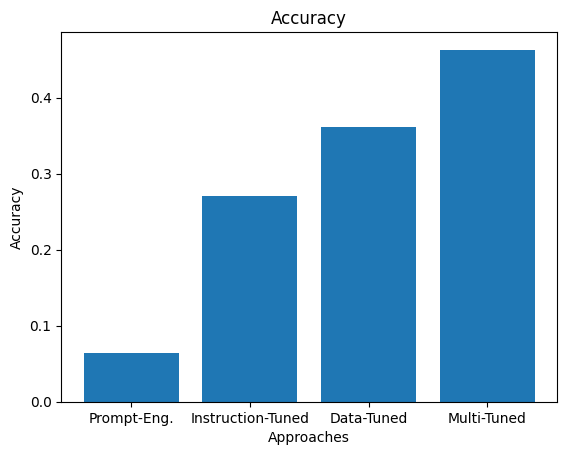

<Figure size 3000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Prompt-Eng.', 'Instruction-Tuned', 'Data-Tuned', 'Multi-Tuned']
values = [0.0642, 0.2713, 0.3612, 0.4631]

# Create bar graph
plt.bar(categories, values)

# Add title and labels
plt.title('Accuracy')
plt.xlabel('Approaches')
plt.ylabel('Accuracy')

plt.figure(figsize=(30, 6))
# plt.xticks(fontsize=10)

# Display the graph
plt.show()


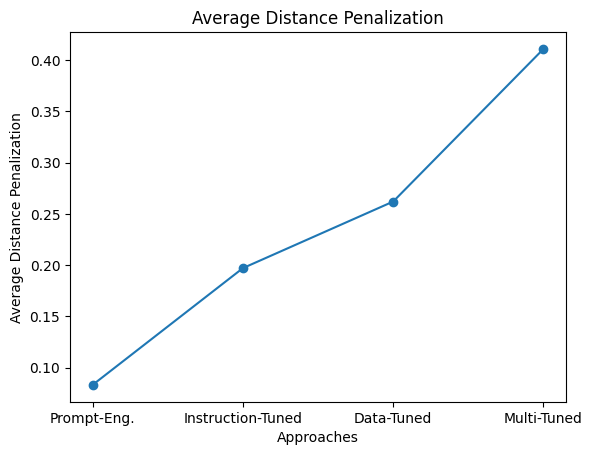

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Prompt-Eng.', 'Instruction-Tuned', 'Data-Tuned', 'Multi-Tuned']
values = [0.083, 0.197, 0.262, 0.411]

# Create line graph
plt.plot(categories, values, marker='o', linestyle='-')

# Add title and labels
plt.title('Average Distance Penalization')
plt.xlabel('Approaches')
plt.ylabel('Average Distance Penalization')

# Set x-axis tick positions and labels
plt.xticks(categories)

# Display the graph
plt.show()


In [ ]:
from torch import cuda, bfloat16
import transformers

model_id = 'meta-llama/Llama-2-13b-chat-hf'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

# begin initializing HF items, need auth token for these
hf_auth = 'HF_AUTH_TOKEN'
model_config = transformers.AutoConfig.from_pretrained(
    model_id,
    use_auth_token=hf_auth
)

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto',
    use_auth_token=hf_auth
)
model.eval()
print(f"Model loaded on {device}")

In [ ]:
from abc import ABC, abstractmethod

import pandas as pd


class InstructDataset(ABC):
    """
    Abstract class for creating Instruct Datasets
    """

    def __init__(self, dataset_path: str):
        """
        Initialize the dataset
        :param dataset_path: The path to the dataset
        """
        self.dataset = None
        self.load_dataset(dataset_path)

    def load_dataset(self, dataset_path: str) -> None:
        """
        Load the dataset from the given path
        :param dataset_path: The path to the dataset
        :return: None
        """
        self.dataset = pd.read_csv(dataset_path)

    def rename_columns(self, columns: dict[str, str]) -> None:
        """
        Rename the columns of the dataset
        :param columns: A dictionary of the form {old_name: new_name}
        :return: None
        """
        self.dataset = self.dataset.rename(columns=columns)

    def drop_columns(self, columns: list[str]) -> None:
        """
        Drop the columns from the dataset
        :param columns: A list of column names to drop
        :return: None
        """
        drop_columns = [col for col in columns if col in self.dataset.columns]
        self.dataset = self.dataset.drop(columns=drop_columns)

    def drop_bad_rows(self, columns: list[str]) -> None:
        """
        Drop the rows which have bad values in the columns
        :param columns: A list of columns to check for bad values
        :return: None
        """
        self.dataset = self.dataset.dropna(subset=columns)
        self.dataset = self.dataset.drop_duplicates(subset=columns)

    def create_instruction(self, instruction: str) -> None:
        """
        Create an instruction column in the dataset
        :param instruction: The instruction to add to the dataset
        :return: None
        """
        self.dataset["instruction"] = instruction

    @abstractmethod
    def create_prompt(self) -> None:
        """
        Create the prompt column in the dataset
        :return: None
        """
        pass

    def get_dataset(self) -> pd.DataFrame:
        """
        Get the dataset
        :return: The dataset
        """
        return self.dataset


class Llama2InstructDataset(InstructDataset):

    def create_prompt(self):
        """
        Create the prompt column in the dataset which will be used for
        """
        prompts = []
        for index, row in self.dataset.iterrows():
            prompt = f"""<|start_header_id|>system<|end_header_id|> {row['instruction']}<|eot_id|><|start_header_id|>user<|end_header_id|> This is the question: {row['input']}<|eot_id|><|start_header_id|>assistant<|end_header_id|> {row['output']}<|eot_id|>"""
            prompts.append(prompt)
        self.dataset["prompt"] = prompts

In [ ]:
# Used for multi-gpu
local_rank = -1
per_device_train_batch_size = 4
per_device_eval_batch_size = 4
gradient_accumulation_steps = 1
learning_rate = 2e-4
max_grad_norm = 0.3
weight_decay = 0.001
lora_alpha = 16
lora_dropout = 0.1
lora_r = 64
max_seq_length = None

# The model that you want to train from the Hugging Face hub
model_name = "guardrail/llama-2-7b-guanaco-instruct-sharded"

# Fine-tuned model name
new_model = "llama-2-7b-guanaco-dolly-mini"

# The instruction dataset to use
dataset_name = "databricks/databricks-dolly-15k"

# Activate 4-bit precision base model loading
use_4bit = True

# Activate nested quantization for 4-bit base models
use_nested_quant = False

# Compute dtype for 4-bit base models
bnb_4bit_compute_dtype = "float16"

# Quantization type (fp4 or nf4)
bnb_4bit_quant_type = "nf4"

# Number of training epochs
num_train_epochs = 2

# Enable fp16 training, (bf16 to True with an A100)
fp16 = False

# Enable bf16 training
bf16 = False

# Use packing dataset creating
packing = False

# Enable gradient checkpointing
gradient_checkpointing = True

# Optimizer to use, original is paged_adamw_32bit
optim = "paged_adamw_32bit"

# Learning rate schedule (constant a bit better than cosine, and has advantage for analysis)
lr_scheduler_type = "cosine"

# Number of optimizer update steps, 10K original, 20 for demo purposes
max_steps = -1

# Fraction of steps to do a warmup for
warmup_ratio = 0.03

# Group sequences into batches with same length (saves memory and speeds up training considerably)
group_by_length = True

# Save checkpoint every X updates steps
save_steps = 10

# Log every X updates steps
logging_steps = 1

# The output directory where the model predictions and checkpoints will be written
output_dir = "./results"

# Load the entire model on the GPU 0
device_map = {"": 0}

# Visualize training
report_to = "tensorboard"

# Tensorboard logs
tb_log_dir = "./results/logs"

In [ ]:
model.save(pth)

In [ ]:
import huggingface_hub